# LIBRERIAS

In [1]:
import pandas as pd
import numpy as np

## Librerias para graficación
import matplotlib.pyplot as plt
import seaborn as sns

# LECTURA DEL DATASET

In [2]:
!curl -L "https://huggingface.co/datasets/GonzaloA/fake_news/resolve/refs%2Fconvert%2Fparquet/default/train/0000.parquet" -o 0.parquet 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1012  100  1012    0     0   4183      0 --:--:-- --:--:-- --:--:--  4216

  0 36.9M    0  220k    0     0   275k      0  0:02:17 --:--:--  0:02:17  275k
 63 36.9M   63 23.4M    0     0  12.6M      0  0:00:02  0:00:01  0:00:01 22.2M
100 36.9M  100 36.9M    0     0  15.5M      0  0:00:02  0:00:02 --:--:-- 23.2M


In [3]:
df = pd.read_parquet("0.parquet")

In [4]:
df

,Unnamed: 0,title,text,label
0,0,‘Maury’ Show Official Facebook Posts F*CKED U...,Maury is perhaps one of the trashiest shows on...,0
1,1,Trump’s Favorite News Channel Tries To Soothe...,"Yesterday, after the father of one of the UCLA...",0
2,2,"Russia warns Iraq, Kurds not to destabilize Mi...",MOSCOW (Reuters) - Russia on Wednesday warned ...,1
3,3,WATCH STEVE SCALISE Throw A Strike At The Nati...,"House Majority Whip Steve Scalise (R., La.) th...",0
4,4,Trump Will HATE What Stephen Colbert Just Did...,It can be said that Late Show host Stephen Col...,0
...,...,...,...,...
24348,24348,EU Parliament chief asks Poland to ensure MEPs...,WARSAW (Reuters) - The president of the Europe...,1
24349,24349,Chemical weapons watchdog found sarin used in ...,AMSTERDAM/UNITED NATIONS (Reuters) - An inquir...,1
24350,24350,"Melissa Harris-Perry Is DONE With MSNBC, Pens...","As you may or may not know at this point, MSNB...",0
24351,24351,Trump's pick for Navy secretary withdraws,WASHINGTON (Reuters) - U.S. President Donald T...,1


In [5]:
# Eliminamos columnas innecesarias para el entramiento del modelo
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.columns

Index(['title', 'text', 'label'], dtype='object')

d:\Codes\IA-Project\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\IA-Project\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\IA-Project\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\IA-Project\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(-12.430555555555555, 0.5, 'Conteo')

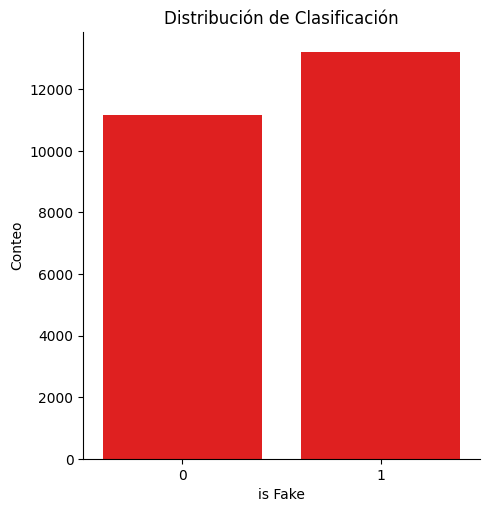

In [6]:
# Visualizamos si la data esta balanceada
sns.catplot(x="label", kind="count", color="r", data=df)
plt.title("Distribución de Clasificación")
plt.xlabel("is Fake")
plt.ylabel("Conteo")

# Pre-Procesado del Dataset

In [7]:
import re        # Libreria para expresiones regulares
import gensim    # Libreria para el pre-procesamiento de lenguaje natural
import nltk      # Libreria con p   
from nltk.corpus import stopwords
stemmer = nltk.stem.SnowballStemmer('english')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pms_l\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- Tokenizacion, limpieza de caracteres especiales, espacios vacios

In [8]:
def processing_text(texto):
    # Paso 1: Remover con un expresión regular carateres especiales (no palabras).
    processed_feature = re.sub(r'\W', ' ', str(texto))
    # Paso 2: Remover ocurrencias de caracteres individuales
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    # Paso 3: Remover números (Ocurrencias muy esporádicas en nuestro dataset)
    processed_feature = re.sub(r'[0-9]+', ' ', processed_feature)
    # Paso 4: Simplificar espacios concecutivos a un único espacio entre palabras
    processed_feature = re.sub(' +', ' ', processed_feature)
    # Paso 5: Pasar todo el texto a minúsculas
    processed_feature = processed_feature.lower()
    # Paso 6: Aplicar stemming. Es una forma de enviar las palabras a una raiz común simplificando de esta manera el vocabulario.
    # processed_feature = " ".join([stemmer.stem(i) for i in processed_feature.split()])

    return processed_feature

In [9]:

# El texto ya procesado de cada ejemplo en nuestro dataset lo almacenaremos en la variable "texto_procesado"
df['features'] = list(map(lambda x: gensim.utils.simple_preprocess(x), df['title']+df['text']))
df.head(5)

,title,text,label,features
0,‘Maury’ Show Official Facebook Posts F*CKED U...,Maury is perhaps one of the trashiest shows on...,0,"[maury, show, official, facebook, posts, cked,..."
1,Trump’s Favorite News Channel Tries To Soothe...,"Yesterday, after the father of one of the UCLA...",0,"[trump, favorite, news, channel, tries, to, so..."
2,"Russia warns Iraq, Kurds not to destabilize Mi...",MOSCOW (Reuters) - Russia on Wednesday warned ...,1,"[russia, warns, iraq, kurds, not, to, destabil..."
3,WATCH STEVE SCALISE Throw A Strike At The Nati...,"House Majority Whip Steve Scalise (R., La.) th...",0,"[watch, steve, scalise, throw, strike, at, the..."
4,Trump Will HATE What Stephen Colbert Just Did...,It can be said that Late Show host Stephen Col...,0,"[trump, will, hate, what, stephen, colbert, ju..."


In [10]:
from sklearn.model_selection import train_test_split
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['features'], df['label'] , test_size=0.2)

## Creating the embedding -> Word2Vec / BOW

In [11]:
# Train the word2vec model
w2v_model = gensim.models.Word2Vec(
    X_train,
    vector_size=200,
    window=5,
    min_count=10
)

In [12]:
list(map(lambda x: print(x[0]),w2v_model.wv.most_similar('cat')))

wwe
beyonce
jaysanalysis
soup
ashley
cups
ham
messing
comic
mcgowan


[None, None, None, None, None, None, None, None, None, None]

In [13]:
words = set(w2v_model.wv.index_to_key)
X_train_vect = [np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train]

X_test_vect = [np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test]

In [14]:
# Why is the length of the sentence different than the length of the sentence vector?
for i, v in enumerate(X_train_vect):
    print(len(X_train.iloc[i]), len(v))

749 742
488 484
296 293
142 139
305 300
72 69
368 364
289 286
300 291
89 88
87 86
671 664
387 381
123 114
451 439
691 679
279 275
552 546
318 313
443 434
629 583
1127 1108
580 576
602 600
566 556
616 614
364 353
640 637
247 244
387 386
434 427
99 99
448 432
1028 955
85 85
710 705
809 807
233 231
302 300
259 252
390 383
302 290
444 429
49 47
414 405
129 127
507 491
408 403
604 588
750 741
341 335
406 406
357 348
398 373
371 353
199 197
365 351
103 103
782 759
77 75
66 65
148 147
183 178
391 391
277 275
812 797
158 152
346 342
246 240
257 256
295 292
337 315
604 604
616 584
246 236
251 248
372 365
352 346
405 381
207 199
546 546
484 482
392 389
212 211
259 258
113 113
121 116
88 88
103 102
311 300
271 263
395 389
189 189
833 829
393 391
108 108
352 350
533 517
284 272
137 135
744 740
88 87
170 167
433 408
336 329
271 256
58 58
910 884
209 207
1770 1758
135 131
62 62
1139 1104
570 556
145 143
402 395
978 969
72 70
436 427
451 444
386 380
535 526
415 413
348 333
479 467
345 338
1169 1137
1

In [15]:
def sampling(train):
    X_train_vect_avg = []
    for v in train:
        if v.size:
            X_train_vect_avg.append(v.mean(axis=0))
        else:
            X_train_vect_avg.append(np.zeros(100, dtype=float))
    return X_train_vect_avg

In [16]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
X_train_vect = sampling(X_train_vect)
X_test_vect = sampling(X_test_vect)

In [34]:
# Are our sentence vector lengths consistent?
for i, v in enumerate(X_test_vect):
    print(len(X_train.iloc[i]), len(v))

749 200
488 200
296 200
142 200
305 200
72 200
368 200
289 200
300 200
89 200
87 200
671 200
387 200
123 200
451 200
691 200
279 200
552 200
318 200
443 200
629 200
1127 200
580 200
602 200
566 200
616 200
364 200
640 200
247 200
387 200
434 200
99 200
448 200
1028 200
85 200
710 200
809 200
233 200
302 200
259 200
390 200
302 200
444 200
49 200
414 200
129 200
507 200
408 200
604 200
750 200
341 200
406 200
357 200
398 200
371 200
199 200
365 200
103 200
782 200
77 200
66 200
148 200
183 200
391 200
277 200
812 200
158 200
346 200
246 200
257 200
295 200
337 200
604 200
616 200
246 200
251 200
372 200
352 200
405 200
207 200
546 200
484 200
392 200
212 200
259 200
113 200
121 200
88 200
103 200
311 200
271 200
395 200
189 200
833 200
393 200
108 200
352 200
533 200
284 200
137 200
744 200
88 200
170 200
433 200
336 200
271 200
58 200
910 200
209 200
1770 200
135 200
62 200
1139 200
570 200
145 200
402 200
978 200
72 200
436 200
451 200
386 200
535 200
415 200
348 200
479 200
345 200
1

# Modelating

## RandomForestClassifier

In [18]:
# Instantiate and fit a basic Random Forest model on top of the vectors
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect, y_train.values.ravel())

In [19]:
# Use the trained model to make predictions on the test data
y_pred = rf_model.predict(X_test_vect)

In [20]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Precision: 0.944 / Recall: 0.939 / Accuracy: 0.937


## Redes Neuronales 

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [88]:
# Construir y entrenar la red neuronal
model = Sequential()
model.add(Dense(4, input_shape=[200], activation='relu'))  # 100 es la dimensión de los vectores de Word2Vec
model.add(Dense(2, input_shape=[200], activation='relu'))  # 100 es la dimensión de los vectores de Word2Vec
model.add(Dense(1, activation='sigmoid'))  # Capa de salida para la clasificación binaria

model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 4)                 804       
                                                                 
 dense_20 (Dense)            (None, 2)                 10        
                                                                 
 dense_21 (Dense)            (None, 1)                 3         
                                                                 
Total params: 817 (3.19 KB)
Trainable params: 817 (3.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
history = model.fit(np.array(X_train_vect), y_train, epochs=100, batch_size=32, verbose=True, validation_data=(np.array(X_test_vect), y_test))

Epoch 1/100
609/609 [==============================] - 2s 2ms/step - loss: 0.1545 - accuracy: 0.8522 - val_loss: 0.1054 - val_accuracy: 0.9440
Epoch 2/100
609/609 [==============================] - 1s 1ms/step - loss: 0.0854 - accuracy: 0.9482 - val_loss: 0.0707 - val_accuracy: 0.9516
Epoch 3/100
609/609 [==============================] - 1s 1ms/step - loss: 0.0621 - accuracy: 0.9542 - val_loss: 0.0544 - val_accuracy: 0.9569
Epoch 4/100
609/609 [==============================] - 1s 1ms/step - loss: 0.0497 - accuracy: 0.9574 - val_loss: 0.0468 - val_accuracy: 0.9561
Epoch 5/100
609/609 [==============================] - 1s 1ms/step - loss: 0.0426 - accuracy: 0.9600 - val_loss: 0.0410 - val_accuracy: 0.9602
Epoch 6/100
609/609 [==============================] - 1s 1ms/step - loss: 0.0385 - accuracy: 0.9612 - val_loss: 0.0374 - val_accuracy: 0.9614
Epoch 7/100
609/609 [==============================] - 1s 1ms/step - loss: 0.0356 - accuracy: 0.9625 - val_loss: 0.0352 - val_accuracy: 0.9610

In [90]:
# Evaluar el modelo
loss, accuracy = model.evaluate(np.array(X_test_vect), y_test)
print(f'Accuracy: {accuracy}')

153/153 [==============================] - 0s 1ms/step - loss: 0.0308 - accuracy: 0.9643
Accuracy: 0.9642783999443054


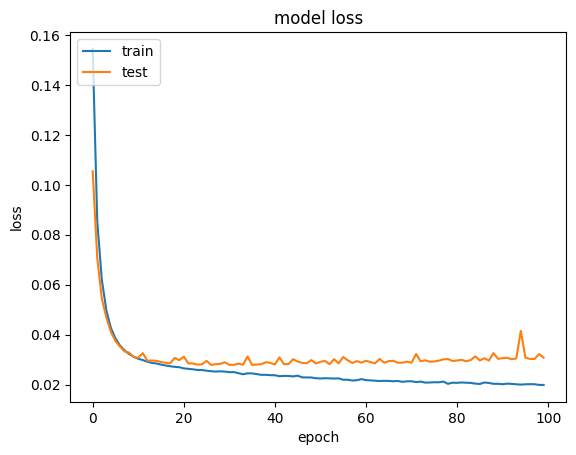

In [91]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()